In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles

import math
import statistics
from collections import Counter

In [2]:
# Please insure the version of matplotlib==3.1.0 for seaborn heatmap
# There is a little issue when drawing heatmap which cuts first and last low in half.
# If you have matplotlib version 3.1.1, please uninstall matplotlib and install version 3.1.0. Thanks!
# https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

import matplotlib
print(matplotlib.__version__)

3.1.0


In [3]:
%pwd

'/Users/yeeun/Desktop/Yeeunhan'

In [4]:
jws = pd.read_csv('./small_data_jwsong.csv')

In [5]:
jws

,index,score,sleep_score,education,study,rest,family,friend,excersise,movie,reading,shopping,meal,activity,hair
0,1,7,7,7.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
1,2,5,7,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,7,7,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,7.0,NaN,7.0,NaN
3,4,5,1,5.0,7.0,2.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,8,8,NaN,7.0,5.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN
5,6,8,5,5.0,7.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,9,5,9.0,8.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN
7,8,3,4,5.0,NaN,7.0,NaN,9.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN
8,9,9,9,NaN,7.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN
9,10,8,2,NaN,6.0,7.0,7.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN


## 워밍업!

In [6]:
jws.dtypes

index            int64
score            int64
sleep_score      int64
education      float64
study          float64
rest           float64
family         float64
friend         float64
excersise      float64
movie          float64
reading        float64
shopping       float64
meal           float64
 activity      float64
hair           float64
dtype: object

In [7]:
# Null 있는지 확인
jws.isnull().sum()

index           0
score           0
sleep_score     0
education       7
study           4
rest           11
family         17
friend         15
excersise       7
movie          17
reading        13
shopping       17
meal           16
 activity      16
hair           17
dtype: int64

In [8]:
jws.describe()

,index,score,sleep_score,education,study,rest,family,friend,excersise,movie,reading,shopping,meal,activity,hair
count,18.000000,18.000000,18.000000,11.000000,14.000000,7.000000,1.0,3.000000,11.000000,1.0,5.00000,1.0,2.000000,2.00000,1.0
mean,9.500000,6.888889,6.500000,5.909091,6.642857,5.714286,7.0,8.666667,9.090909,10.0,7.20000,7.0,7.500000,8.50000,7.0
std,5.338539,1.604732,2.307277,1.445998,1.446861,2.927700,NaN,1.527525,1.136182,NaN,3.03315,NaN,3.535534,2.12132,NaN
min,1.000000,3.000000,1.000000,4.000000,3.000000,2.000000,7.0,7.000000,6.000000,10.0,2.00000,7.0,5.000000,7.00000,7.0
25%,5.250000,6.000000,5.250000,5.000000,6.000000,3.500000,7.0,8.000000,9.000000,10.0,8.00000,7.0,6.250000,7.75000,7.0
50%,9.500000,7.000000,7.000000,5.000000,7.000000,7.000000,7.0,9.000000,9.000000,10.0,8.00000,7.0,7.500000,8.50000,7.0
75%,13.750000,8.000000,8.000000,7.000000,7.000000,7.000000,7.0,9.500000,10.000000,10.0,8.00000,7.0,8.750000,9.25000,7.0
max,18.000000,9.000000,9.000000,9.000000,9.000000,10.000000,7.0,10.000000,10.000000,10.0,10.00000,7.0,10.000000,10.00000,7.0


# Summary 해석
* 데이터는 2019년 8월 동안 총 18일의 기록을 대상으로 합니다.

### Q1. 실제로 기분 점수는 어떤 분포를 합니까? 점수별 일 수를 도출하세요.

In [14]:
jws.groupby(['score']).size()

score
3    1
5    3
6    2
7    4
8    6
9    2
dtype: int64

### Q2. 운동 만족도별 기분 점수를 구하세요. 운동 만족도가 하루의 기분에 영향을 미치나요?

In [15]:
jws.groupby(['excersise','score']).size()

excersise  score
6.0        6        1
9.0        5        2
           7        1
           8        2
           9        1
10.0       6        1
           8        2
           9        1
dtype: int64

# 1. Central Tendency 중심경향성
데이터의 중심이 어디있는지를 나타내는 지표를 중심경향성(Central Tendency)라고 합니다. 대부분 평균(Average)를 사용하는데요, 필요에 따라 Median(중앙값), 최빈값(Mode)를 사용하기도 합니다. 평균에도 종류가 굉장히 많은데요. 산술평균, 기하평균, 조화평균, 가중산술평균에 대해서 들어보신적이 있을겁니다. 다양한 평균에 대해서는 『세상에서 가장 쉬운 통계학 입문』을 참고해주세요!

In [18]:
# 산술평균
def mean(x):
    return sum(x) / len(x)

In [19]:
mean(jws['score'])

6.888888888888889

산술평균의 데이터의 모든 값에 영향을 받는다는 특징이 있어요. 예를들어 리스트 a의 가장 큰 값을 100으로 바꿔보겠습니다.

In [20]:
statistics.median(jws['score'])

7.0

In [21]:
print(jws['score'].quantile(0.1))
print(jws['score'].quantile(0.5))
print(jws['score'].quantile(0.9))

5.0
7.0
8.3


In [22]:
statistics.mode(jws['score'])

8

# 2. Measure of Variation 산포의 척도
데이터가 얼마나 퍼져있는지를 나타냅니다. 정규교육을 밟으면서 우리는 산포의 척도 중 분산과 표준편차를 배웠습니다. 나머지는 이보다도 더 쉽습니다. 직관적으로 생각해보면 데이터의 최대값에서 최소값을 뺀 것도 데이터가 얼마나 퍼져있는지를 나타내줄 수 있겠지요. 이를 `range`라고 정의할 수 있습니다.

In [23]:
def data_range(x):
    return max(x) - min(x)

In [24]:
data_range(jws['score'])

6

비슷하게 데이터의 상위 25%에 해당하는 값과 하위 25%에 해당하는 값의 차이를 계산해 볼 수도 있겠지요. 이를 특별히 `interquartile range`라고 부릅니다. 기분 점수의 interquartile range는 아래와 같습니다.

In [25]:
jws['score'].quantile(0.75) - jws['score'].quantile(0.25)

2.0

학창시절의 기억을 되살려서 분산과 표준편차를 구해볼까요. 간단하게는 numpy의 `np.var()`, `np.std()` 함수를 사용할 수 있지만 이 함수들을 사용하지 않고 구현해봅시다. Pandas의 `df.describe()` 함수의 결과에서도 표준편차를 볼 수 있습니다. `std`를 봐주세요. 표준편차 값이 클수록 데이터가 퍼져있음을 의미합니다.

In [27]:
print(np.var(jws['score']))
print(np.std(jws['score']))

2.432098765432099
1.5595187608464667


# 3. Box and Whisker Plot
* Box and Whisker Plot의 개념 설명에 대해서 잘 설명된 글: https://boxnwhis.kr/2019/02/19/boxplot.html
* [Pandas로 Box and Whisker Plot 그리기 official manual](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html)

## Box and Whisker Plot with Pandas

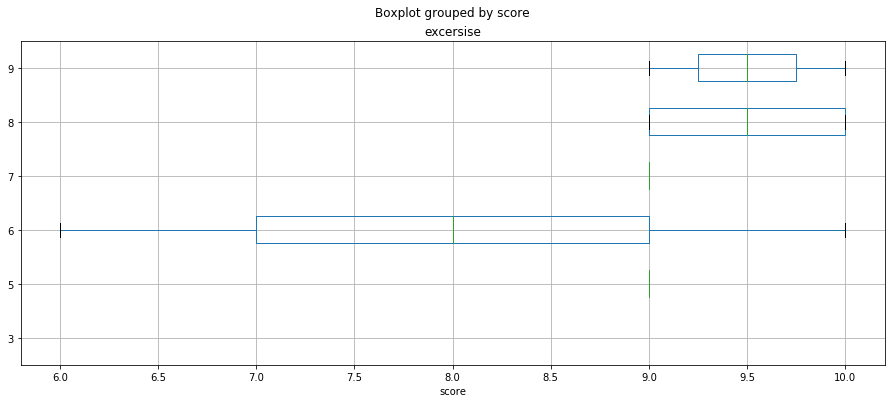

In [9]:
jws.boxplot(column=['excersise'], by='score', figsize=(15,6), vert=False)

### Q9. Box and Whisker Plot의 결과를 해석해보세요.

# 4. Correlation 상관관계

두 변수 사이에 어떤 관계(Correlation)가 있는지 알아보기 위해서 우리는 공분산, 상관계수같은 개념을 이용합니다. 상관관계는 공분산을 X, Y 각각의 표준편차를 나눠 계산하며 -1(완벽한 음의 상관관계)에서 1(완벽한 양의 상관관계) 사이의 값을 가집니다. 상관관계가 0이라면 X, Y간의 그 어떤 양의 또는 음의 상관관계가 없음을 의미합니다. 만약 상관관계가 0.2라면 상대적으로 약한 양의 상관관계를 가진다 말 할 수 있습니다.
* Mathematical notation: https://en.wikipedia.org/wiki/List_of_mathematical_symbols_by_subject

Pandas에서는 데이터프레임 전체의 관계를 한 눈에 살펴볼 수 있도록 `corr()` 함수를 제공합니다.

In [34]:
jws.corr()

,index,score,sleep_score,education,study,rest,family,friend,excersise,movie,reading,shopping,meal,activity,hair
index,1.000000,0.151060,0.279373,-0.091038,-0.219510,0.853934,NaN,0.970725,-0.122595,NaN,-0.128887,NaN,1.0,1.0,NaN
score,0.151060,1.000000,0.190647,0.552563,0.408305,0.175271,NaN,0.000000,0.348135,NaN,-0.512272,NaN,-1.0,1.0,NaN
sleep_score,0.279373,0.190647,1.000000,0.210566,-0.159252,0.314919,NaN,0.052414,0.071863,NaN,0.838557,NaN,-1.0,1.0,NaN
education,-0.091038,0.552563,0.210566,1.000000,0.376036,-0.500000,NaN,NaN,0.145556,NaN,0.960769,NaN,-1.0,NaN,NaN
study,-0.219510,0.408305,-0.159252,0.376036,1.000000,-0.534522,NaN,NaN,0.000000,NaN,-0.956522,NaN,NaN,NaN,NaN
rest,0.853934,0.175271,0.314919,-0.500000,-0.534522,1.000000,NaN,1.000000,0.057166,NaN,NaN,NaN,1.0,NaN,NaN
family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
friend,0.970725,0.000000,0.052414,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.0,NaN
excersise,-0.122595,0.348135,0.071863,0.145556,0.000000,0.057166,NaN,NaN,1.000000,NaN,0.277350,NaN,NaN,NaN,NaN
movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


seaborn이라는 시각화 라이브러리를 이용해 heatmap을 그려 볼 수도 있습니다.

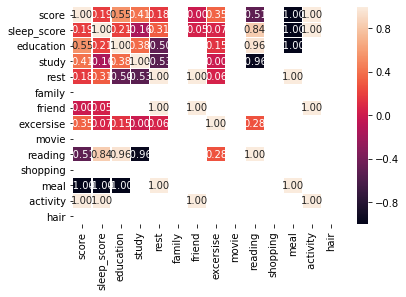

In [10]:
sns.heatmap(jws.drop('index', axis=1).corr(), annot=True, fmt = '.2f', linewidths=0.2)
plt.show()

### Q12. Correlation matrix를 해석해보세요.
참고자료: https://www.slideshare.net/ssuser2fe594/2107-80754131 p56부터

* Answer
* Answer

## 이상치를 포함한 상관관계

In [37]:
anscombe1_outlier = pd.DataFrame({
    'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5, 17],
    'y': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68, 0.5]
})

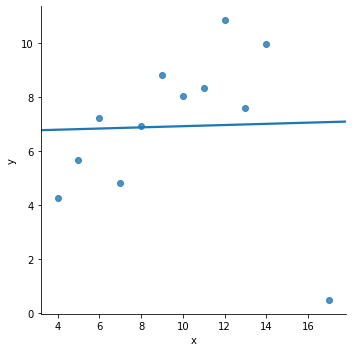

In [38]:
sns.lmplot(data=anscombe1_outlier, x='x', y='y', ci=None)

이상치를 제거하니 더 강력한 상관관계를 볼 수 있다. 상관관계 분석에서 이상치를 발견하고 제거해주는 것이 이래서 중요하다.

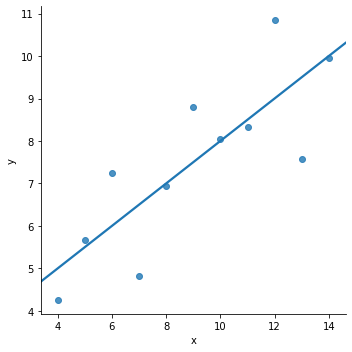

In [41]:
sns.lmplot(data=anscombe1_outlier.drop(index=11), x='x', y='y', ci=None)

### Q13. Titanic 데이터에서 이상치를 관찰하고, 이상치를 제외한 상관계수를 다시 계산해봅시다.

# 5. Correlation and Causation 상관관계와 인과관계

![Correlation is not Causation](http://commons.trincoll.edu/cssp/wp-content/blogs.dir/68/files/2013/12/CorrelationCausationFinal1.jpg)

# 6. 기초통계가 모든 것을 설명하지는 않는다.

## 1. 평균, 분산, 상관관계의 함정. [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe's_quartet)

In [18]:
anscombe1 = pd.DataFrame({
    'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
    'y': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    'group': 1
})

anscombe2 = pd.DataFrame({
    'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
    'y': [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    'group': 2
})

anscombe3 = pd.DataFrame({
    'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
    'y': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    'group': 3
})

anscombe4 = pd.DataFrame({
    'x': [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8],
    'y': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89],
    'group': 4
})

In [22]:
anscombes_quartet = pd.concat([anscombe1, anscombe2, anscombe3, anscombe4])

In [43]:
anscombes_quartet.groupby(['group']).describe()

x                                               y            \
      count mean       std  min  25%  50%   75%   max count      mean   
group                                                                   
1      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
2      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
3      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
4      11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                 
            std   min    25%   50%   75%    max  
group                                            
1      2.031568  4.26  6.315  7.58  8.57  10.84  
2      2.031657  3.10  6.695  8.14  8.95   9.26  
3      2.030424  5.39  6.250  7.11  7.98  12.74  
4      2.030579  5.25  6.170  7.04  8.19  12.50

In [44]:
anscombes_quartet.groupby(['group']).corr()

x         y
group                      
1     x  1.000000  0.816421
      y  0.816421  1.000000
2     x  1.000000  0.816237
      y  0.816237  1.000000
3     x  1.000000  0.816287
      y  0.816287  1.000000
4     x  1.000000  0.816521
      y  0.816521  1.000000

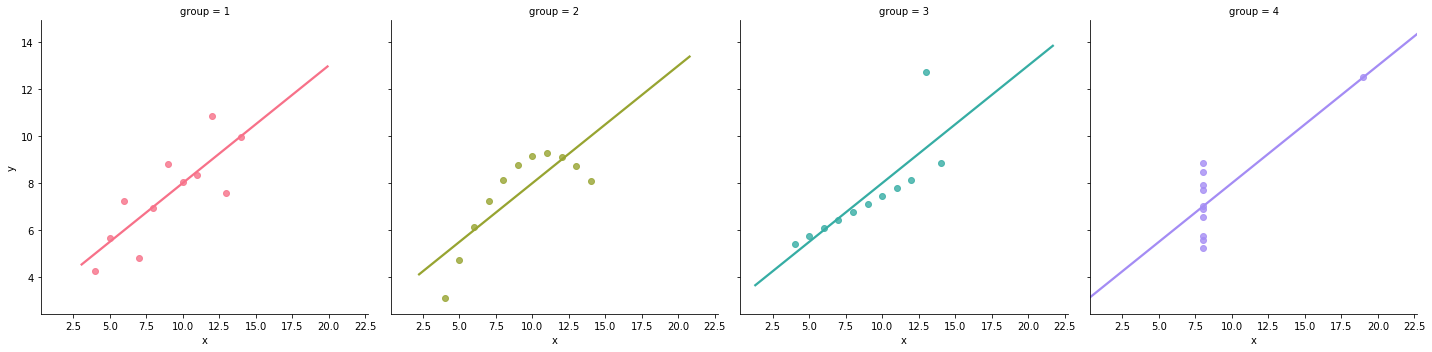

In [28]:
sns.lmplot(x='x', y='y', col='group', hue='group', data=anscombes_quartet, fit_reg=True, ci=None, palette="husl")

`Anscombe's quartet`은 평균, 분산, 상관관계가 거의 동일한 네 데이터셋이다. 대표적인 요약통계량들이 거의 일치함에도 데이터의 생김새는 매우 다르다. 이 네 데이터셋을 같은 패턴을 보이는 데이터라고 설명할 수 있을까?

## 2. 상관관계의 함정

In [57]:
df = pd.DataFrame({
    'x': [-1, -2, 0, 1, 2],
    'y': [1, 2, 0, 1, 2]
})

In [59]:
df

,x,y
0,-1,1
1,-2,2
2,0,0
3,1,1
4,2,2


In [58]:
np.corrcoef(df['x'], df['y'])

array([[1., 0.],
       [0., 1.]])

x와 y의 상관계수는 0입니다. 그렇다고 두 변수간에 아무런 관계도 존재하지 않는 것일까요? 아닙니다. y는 x의 절대값이라는 선명한 관계가 있습니다. 이처럼 상관계수로 모든 관계를 설명할 수는 없습니다.

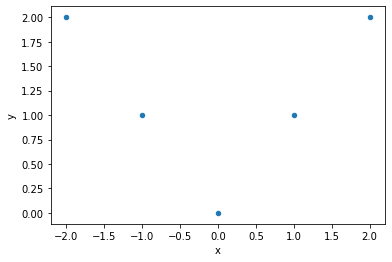

In [64]:
df.plot.scatter(x='x', y='y')

## 상관관계의 함정, 또 다른 예시

In [117]:
circle = make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.999)

In [118]:
circle_df = pd.DataFrame({
    'x': [c[0] for c, i in zip(circle[0], circle[1]) if i == 0],
    'y': [c[1] for c, i in zip(circle[0], circle[1]) if i == 0]
})

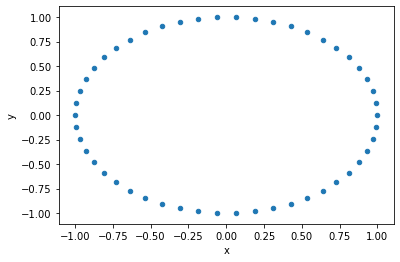

In [119]:
circle_df.plot.scatter(x='x', y='y')

In [130]:
np.corrcoef(circle_df['x'], circle_df['y'])

array([[1.00000000e+00, 3.04066241e-17],
       [3.04066241e-17, 1.00000000e+00]])

# 7. Simpson's Paradox 심슨의 역설

## Simpson's Paradox in Titanic dataset
* Age & Fare (confounding variable: class)
* Class & Survival rate (confounding variable: gender)

## References
### Books
* 『밑바닥부터 시작하는 데이터 과학』
* 『세상에서 가장 쉬운 통계학 입문』

### About Box and Whisker Plot 
* https://boxnwhis.kr/2019/02/19/boxplot.html

### About Simpson's Paradox
* https://stats.stackexchange.com/questions/185047/is-this-simpsons-paradox-on-the-titanic-data-set
* https://select-statistics.co.uk/blog/hidden-data-and-surviving-a-sinking-ship-simpsons-paradox/
* https://www2.stat.duke.edu/courses/Fall12/sta611/SimpsonsParadox.pdf